# Python 的 50+ 練習：資料科學學習手冊

> 資料科學模組 Matplotlib 入門

[數據交點](https://www.datainpoint.com/) | 郭耀仁 <yaojenkuo@datainpoint.com>

## 這個章節會登場的模組

`matplotlib` 模組。

## 關於 Matplotlib

## 什麼是 Matplotlib

> Matplotlib 是 Python 資料視覺化的第三方模組。

來源：<https://matplotlib.org>

## （沒什麼用的冷知識）Matplotlib 與 Matlab 有一點關係

- Matrix plotting library.
- 模仿 Matlab 作圖的指令與功能。

來源：<https://matplotlib.org/stable/users/project/history.html>

## 根據說明文件的範例載入

實際上主要在使用的是 `matplotlib.pyplot`

來源：<https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

## 如果環境中沒有安裝 Matplotlib，載入時會遭遇 `ModuleNotFoundError`

```
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
ModuleNotFoundError: No module named 'matplotlib'
```

## 如果遭遇 `ModuleNotFoundError` 可以在終端機使用 `pip install matplotlib` 或者 `conda install matplotlib` 指令安裝

若要指定模組版本可以加上 `==MAJOR.MINOR.PATCH` 課程使用的模組版本為 3.5

```bash
pip install matplotlib==3.5
```
或者

```bash
conda install matplotlib==3.5
```

## 可以透過兩個屬性檢查版本號與安裝路徑

- `__version__` 屬性檢查版本號。
- `__file__` 屬性檢查安裝路徑。

In [2]:
print(mpl.__version__)
print(mpl.__file__)

3.5.0
/Users/kuoyaojen/opt/miniconda3/envs/pythonfiftyplus/lib/python3.9/site-packages/matplotlib/__init__.py


## 為什麼資料需要視覺化

視覺化在探索性資料分析中佔有舉足輕重的地位，因為對人來說原始資料是相當抽象的。

## 抽象的原始資料

例如在「資料科學模組 NumPy 入門」章節我們透過 `np.random` 建立的隨機 `ndarray`

In [3]:
import numpy as np

m = 10000
uniform_ndarray = np.random.random(m)
normal_ndarray = np.random.normal(0, 1, m)
randint_ndarray = np.random.randint(1, 7, size=m)
print(uniform_ndarray)
print(normal_ndarray)
print(randint_ndarray)

[0.10079184 0.43321226 0.93911259 ... 0.49498118 0.56317258 0.96798976]
[-0.63001135  1.66315005  0.66757581 ...  0.07908391 -0.0691163
 -0.32847608]
[2 4 4 ... 5 4 5]


## 將原始資料視覺化

In [4]:
def show_uniform_ndarray(arr):
    fig = plt.figure()
    ax = plt.axes()
    ax.hist(arr, bins=50)
    plt.show()

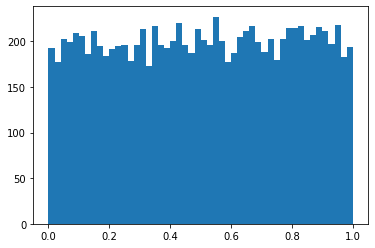

In [5]:
show_uniform_ndarray(uniform_ndarray)

## 將原始資料視覺化（續）

In [6]:
def show_normal_ndarray(arr):
    fig = plt.figure()
    ax = plt.axes()
    ax.hist(arr, bins=50)
    plt.show()

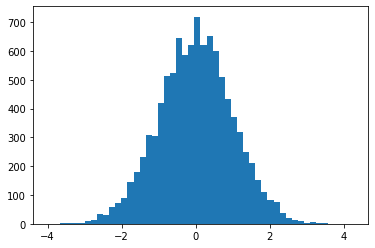

In [7]:
show_normal_ndarray(normal_ndarray)

## 將原始資料視覺化（續）

In [8]:
def show_randint_ndarray(arr):
    fig = plt.figure()
    ax = plt.axes()
    uniques, counts = np.unique(arr, return_counts=True)
    ax.bar(uniques, counts)
    plt.show()

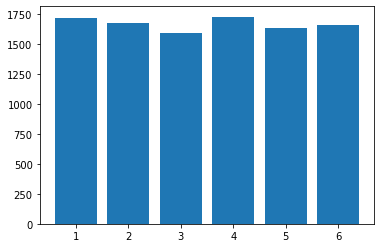

In [9]:
show_randint_ndarray(randint_ndarray)

## 好的視覺化要素

- 有資訊價值、簡潔與美觀。
- 經典視覺化：
    - [Charles Minard's map of Napoleon's disastrous Russian campaign of 1812](https://en.wikipedia.org/wiki/Charles_Joseph_Minard#/media/File:Minard.png)
    - [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://youtu.be/jbkSRLYSojo)

## 兩種語法

## 新手學習 Matplotlib 的最大挑戰：兩種不同的作圖語法

1. Matlab 風格。
2. 物件導向風格。

## Matlab 風格

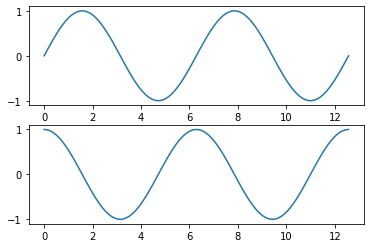

In [10]:
x = np.linspace(0, np.pi*4, 100)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(x, np.sin(x))
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))
plt.show()

## Matlab 風格的優缺點

- 優點：指令式語法，比較直觀。
- 缺點：狀態型介面，需要依程式碼順序閱讀才能理解。

## 物件導向風格

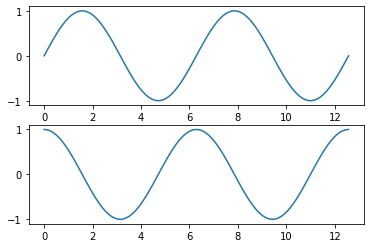

In [11]:
fig, axes = plt.subplots(2, 1)
axes[0].plot(x, np.sin(x))
axes[1].plot(x, np.cos(x))
plt.show()

## 物件導向風格的優缺點

- 優點：物件型介面，不需要依程式碼順序閱讀也能理解。
- 缺點：對不熟悉物件導向概念的人不友善。

由於我們在「使用類別組織函數與資料」章節對物件導向概念已經有入門理解，因此採用物件導向風格是最適合的。

## 視覺化五步驟

## 視覺化的標準五步驟

1. 建立 `ndarray`
2. 建立「畫布物件」與「軸物件」。
3. 使用「軸物件」的作圖方法建立主要圖形。
4. 使用「軸物件」的作圖方法添加圖形元素。
5. 顯示或者儲存圖形。

## 建立 `ndarray`

In [12]:
x = np.linspace(0, np.pi*2, 100)
sinx = np.sin(x)

## 建立「畫布物件」與「軸物件」

使用 `plt.subplots()` 函數。

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


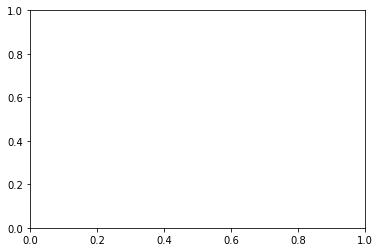

In [13]:
fig, ax = plt.subplots()
print(type(fig))
print(type(ax))

## 使用「軸物件」的作圖方法建立主要圖形

`AxesSubplot.plot()` 能夠建立線圖。

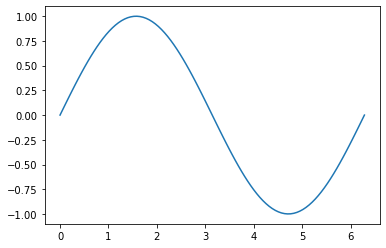

In [14]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, sinx)

## 使用「軸物件」的作圖方法添加圖形元素

(-5.0, 5.0)

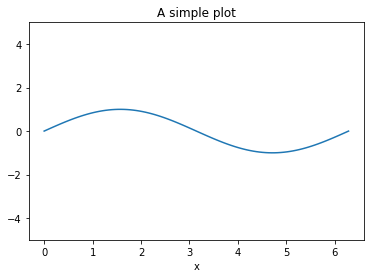

In [15]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, sinx)
ax.set_title('A simple plot')
ax.set_xlabel('x')
ax.set_ylim(-5, 5)

## 顯示圖形

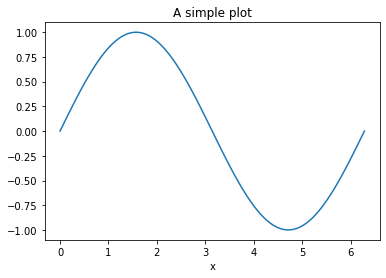

In [16]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, sinx)
ax.set_title('A simple plot')
ax.set_xlabel('x')
plt.show()

## 儲存圖形：可支援的圖片格式

In [17]:
fig = plt.figure()
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

<Figure size 432x288 with 0 Axes>

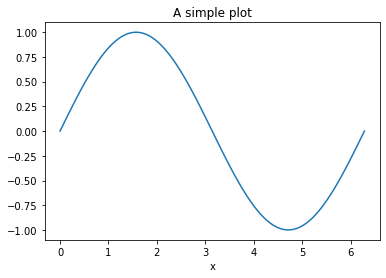

In [18]:
fig = plt.figure()
axes = plt.axes()
axes.plot(x, sinx)
axes.set_title('A simple plot')
axes.set_xlabel('x')
fig.savefig('a_simple_plot.png')

## 中文字（非歐美文字）顯示問題解決

## 如何調整中文字型無法顯示的問題

Matplotlib 預設使用的字體不支援中文、日文、韓文等非歐美語系文字。

/Users/kuoyaojen/opt/miniconda3/envs/pythonfiftyplus/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31777 (\N{CJK UNIFIED IDEOGRAPH-7C21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kuoyaojen/opt/miniconda3/envs/pythonfiftyplus/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21934 (\N{CJK UNIFIED IDEOGRAPH-55AE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kuoyaojen/opt/miniconda3/envs/pythonfiftyplus/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kuoyaojen/opt/miniconda3/envs/pythonfiftyplus/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kuoyaojen/opt/miniconda3/envs/pyt

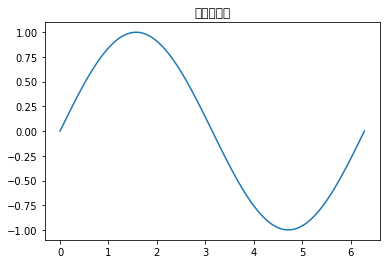

In [19]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, sinx)
ax.set_title('簡單的圖形')
plt.show()

## 指定可以支援中文字體的字型

使用 `matplotlib.font_manager` 的 `FontProperties()` 函數。

In [20]:
from matplotlib.font_manager import FontProperties

msjh = FontProperties(fname="msjh.ttc") # Font supports traditional Chinese

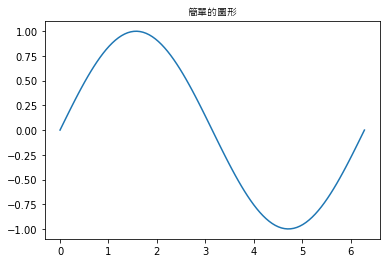

In [21]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, sinx)
ax.set_title('簡單的圖形', fontproperties=msjh)
plt.show()

## 重點統整

- 視覺化在探索性資料分析中佔有舉足輕重的地位，因為對人來說原始資料是相當抽象的。
- 視覺化的標準五步驟
    - 建立 `ndarray`。
    - 建立「畫布物件」與「軸物件」。
    - 使用「軸物件」的作圖方法建立主要圖形。
    - 使用「軸物件」的作圖方法添加圖形元素。
    - 顯示或者儲存圖形。
- 指定可以支援中文的字體檔案解決中文無法顯示的問題。